In [3]:
# Assumption based weights and bias values for SVM demostration.
import numpy as np

# Define weights, bias, and dataset
weights = np.array([2, -1])  # w1 and w2
bias = 3  # b

# Dataset (x1, x2)
data_points = np.array([
    [4.5, 2.3],
    [-1.2, 3.4],
    [5.1, 1.7],
    [-0.8, 4.0]
])

# Function to calculate the decision value and predict class
def classify(points, weights, bias):
    results = []
    for point in points:
        # Calculate the decision function
        decision_value = np.dot(weights, point) + bias
        # Apply the sign function
        prediction = np.sign(decision_value)
        # Store results
        results.append((point, decision_value, prediction))
    return results

# Classify the points
results = classify(data_points, weights, bias)

# Print results
print(f"{'Point (x1, x2)':<20} {'f(x)':<10} {'Prediction':<10}")
print("-" * 40)
for point, decision_value, prediction in results:
    print(f"{str(tuple(point)):<20} {decision_value:<10.2f} {int(prediction):<10}")


Point (x1, x2)       f(x)       Prediction
----------------------------------------
(4.5, 2.3)           9.70       1         
(-1.2, 3.4)          -2.80      -1        
(5.1, 1.7)           11.50      1         
(-0.8, 4.0)          -2.60      -1        


### Optimization Approach

#### 1. Objective Function (Hinge Loss):
In SVM, the goal is to maximize the margin between the classes while minimizing classification errors. This can be expressed as:

$$
\text{Minimize: } \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Where:
- ||w||^2 : Regularization term to prevent overfitting.
- C: Regularization hyperparameter that controls the tradeoff between margin maximization and misclassification.
- Yi : True Label {+1, -1}
- Xi : Feature vector of the 𝑖-th data point.



##### Steps to Apply Optimization:
* Step 1: Use the labeled dataset to calculate the loss using the hinge loss function.
* Step 2: Use an optimization algorithm like gradient descent or SMO (Sequential Minimal Optimization) to update 𝑤 and 𝑏.
* Step 3: Iterate until convergence or when the loss is minimized.

In [1]:
from sklearn.svm import SVC
import numpy as np

# Define the dataset (features and labels)
X = np.array([
    [4.5, 2.3],
    [-1.2, 3.4],
    [5.1, 1.7],
    [-0.8, 4.0]
])

# Labels (+1 or -1)
y = np.array([1, -1, 1, -1])

# Create and train an SVM classifier
svm = SVC(kernel='linear', C=1.0)  # Linear kernel for linear decision boundary
svm.fit(X, y)

# Get the optimized weights and bias
weights = svm.coef_[0]  # Optimized weights
bias = svm.intercept_[0]  # Optimized bias

# Print results
print("Optimized Weights (w):", weights)
print("Optimized Bias (b):", bias)

# Predict on the dataset
predictions = svm.predict(X)
print("\nPredictions:", predictions)

# Manual classification using the optimized parameters
decision_values = np.dot(X, weights) + bias
print("\nDecision Values:", decision_values)


Optimized Weights (w): [ 0.34215623 -0.10974822]
Optimized Bias (b): -0.28728216498012216

Predictions: [ 1 -1  1 -1]

Decision Values: [ 0.99999994 -1.0710136   1.27114262 -1.00000004]


<h1>Step-by-Step Example</h1>
<h3>Dataset:</h3>
We have two classes, with three 2D data points:
<br />
<img src="imgs/dataset-1.png">

**Objective of SVM**

SVM finds the optimal hyperplane that separates two classes in such a way that the margin (distance between the hyperplane and the nearest data points of each class) is maximized.

1. Equation of a Hyperplane in 𝑛-dimensional space: <br />
    𝑤⋅𝑥+𝑏=0
<p> Where, 
𝑤 is the weight vector (perpendicular to the hyperplane),
𝑥 is the feature vector,
𝑏 is the bias term.</p>

2. Decision Rule: To classify a point 𝑥𝑖: <br/>
   𝑓(𝑥𝑖) > 0: Class  1 <br/>
   𝑓(𝑥𝑖) < 0:   Class -1



**Optimization Goal**
Maximize the margin (𝑀) between the hyperplane and the nearest points from each class, called support vectors.
1. Margin is given by:
   $$ M = \frac{2}{\|w\|} $$
   For correct classification:<br/>
   Thus, minimizing $$ \|w\|^2 $$  indirectly maximizes 𝑀.
2. Constraints: <br/>
   For class 1 (𝑦=1): 𝑤 ⋅ 𝑥𝑖 + 𝑏 ≥ 1,<br/>
   For class -1 (𝑦=−1): 𝑤 ⋅ 𝑥𝑖 + 𝑏 ≤ −1 <br/>
   These can be combined into: 𝑦𝑖 ( 𝑤 ⋅ 𝑥𝑖 + 𝑏  ) ≥ 1 ∀𝑖 
3. Optimization Problem: <br/>
   


   Minimize:
$$
\frac{1}{2} \|w\|^2
$$

Subject to:
$$
y_i (w \cdot x_i + b) \geq 1
$$

This is a quadratic optimization problem, solved using techniques like Lagrange multipliers

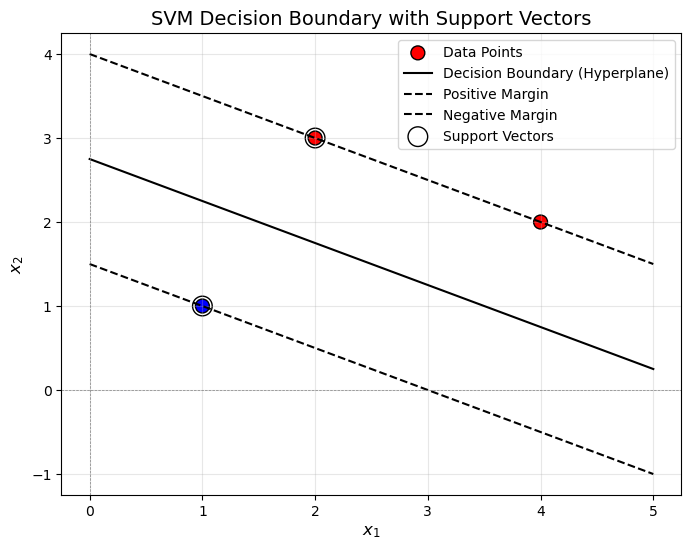

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dataset: Points and labels
X = np.array([[2, 3], [4, 2], [1, 1]])  # Points (x1, x2)
y = np.array([1, 1, -1])                # Labels

# SVM Classifier with Linear Kernel
svm = SVC(kernel='linear', C=1E10)  # High C value for hard margin
svm.fit(X, y)

# Extract hyperplane parameters
w = svm.coef_[0]  # Coefficients for the hyperplane
b = svm.intercept_[0]  # Intercept
margin = 1 / np.sqrt(np.sum(w ** 2))  # Margin size

# Decision boundary (w1*x1 + w2*x2 + b = 0)
xx = np.linspace(0, 5, 100)  # Range of x1 values
yy = -(w[0] * xx + b) / w[1]  # Corresponding x2 values

# Margins (distance = 1 from the decision boundary)
yy_margin_pos = yy + margin * np.sqrt(1 + (w[0] / w[1]) ** 2)
yy_margin_neg = yy - margin * np.sqrt(1 + (w[0] / w[1]) ** 2)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k', label='Data Points')

# Plot the decision boundary and margins
plt.plot(xx, yy, 'k-', label='Decision Boundary (Hyperplane)')
plt.plot(xx, yy_margin_pos, 'k--', label='Positive Margin')
plt.plot(xx, yy_margin_neg, 'k--', label='Negative Margin')

# Highlight support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Annotate and style the plot
plt.title('SVM Decision Boundary with Support Vectors', fontsize=14)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


### Example: Binary Classification with SVM

Accuracy: 100.00%


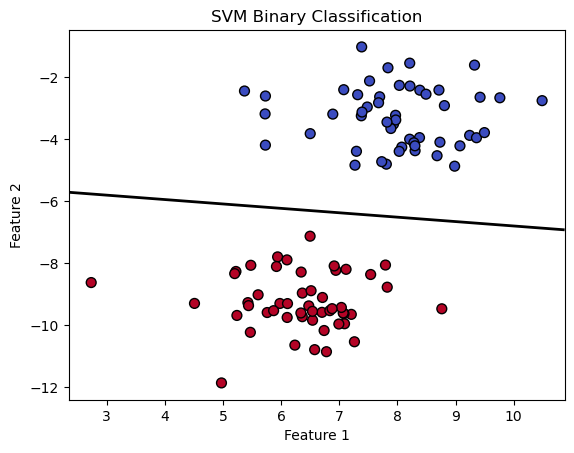

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the SVM model
model = SVC(kernel='linear')  # Linear kernel for simplicity
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualize the decision boundary
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

# Plot the decision boundary
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100),
    np.linspace(ylim[0], ylim[1], 100)
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

plt.title("SVM Binary Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
